In [13]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import multinomial_proportions_confint
import matplotlib.pyplot as plt
import random as rd

In [14]:
S = pd.read_csv('dataset_prepped')
S=S[S.innings == 1][S.match_id < 1175356]
from sim import *
mimu = T20SimX(dir='upto2019\ArrandVersion.pkl')

C:\Users\alfie\AppData\Local\Temp\ipykernel_4548\3272617023.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  S=S[S.innings == 1][S.match_id < 1175356]


In [45]:
mim_X_owj = np.zeros((20,3))
X_owj = np.zeros((20,3))
outcomes = ['fair', 'wide', 'noball']


for j in list(S.index):
    ball = S.loc[j,:]
    r_m = mimu.delivery(ball['bowler'],ball['over'])
    r_o = ball['delivery']
    mim_X_owj[ball['over'] - 1, outcomes.index(r_m)] += 1
    X_owj[ball['over'] - 1, outcomes.index(r_o)] += 1

In [32]:
mimp_o = np.array([[np.sum(mim_X_owj[o,d])/np.sum(mim_X_owj[o,:]) for d in range(3)] for o in range(20)])
p_o = np.array([[np.sum(X_owj[o,d])/np.sum(X_owj[o,:]) for d in range(3)] for o in range(20)])

Text(0, 0.5, 'Observed Probability')

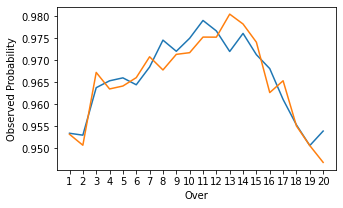

In [54]:
fig = plt.figure(figsize=(5,3))
plt.plot(list(range(1,21)), p_o[:,0])
plt.plot(list(range(1,21)), mimp_o[:,0])
#plt.plot(list(range(20)), mimp_o[:,0])
plt.xticks(list(range(1,21)))
plt.xlabel('Over')
plt.ylabel('Observed Probability')

Text(0, 0.5, 'Observed Probability')

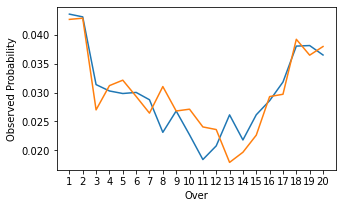

In [55]:
fig = plt.figure(figsize=(5,3))
plt.plot(list(range(1,21)), p_o[:,1])
plt.plot(list(range(1,21)), mimp_o[:,1])
#plt.plot(list(range(20)), mimp_o[:,0])
plt.xticks(list(range(1,21)))
plt.xlabel('Over')
plt.ylabel('Observed Probability')

Text(0, 0.5, 'Observed Probability')

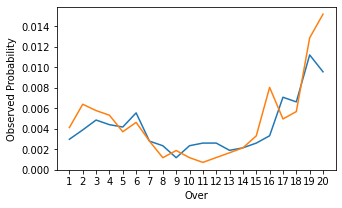

In [56]:
fig = plt.figure(figsize=(5,3))
plt.plot(list(range(1,21)), p_o[:,2])
plt.plot(list(range(1,21)), mimp_o[:,2])
#plt.plot(list(range(20)), mimp_o[:,0])
plt.xticks(list(range(1,21)))
plt.xlabel('Over')
plt.ylabel('Observed Probability')

In [46]:
np.sum(X_owj[:,0])/np.sum(X_owj)

0.9659977050792684

In [47]:
np.sum(mim_X_owj[:,0])/np.sum(mim_X_owj)

0.9657518207151722

In [48]:
np.sum(X_owj[:,1])/np.sum(X_owj)

0.029822260731096176

In [49]:
np.sum(mim_X_owj[:,1])/np.sum(mim_X_owj)

0.029763716834882794

In [50]:
np.sum(X_owj[:,2])/np.sum(X_owj)

0.004180034189635389

In [51]:
np.sum(mim_X_owj[:,2])/np.sum(mim_X_owj)

0.004484462449944969

In [52]:
c = [np.sum(X_owj[:,0]), np.sum(X_owj[:,1]), np.sum(X_owj[:,2])]

In [53]:
multinomial_proportions_confint(c, 0.1)

array([[0.96465309, 0.9672929 ],
       [0.02860837, 0.03108601],
       [0.0037358 , 0.00467685]])

In [3]:
# rowl 
# first lets calc the true means and shit 

rowl_o = []

for o in range(1,21):
    samp_o = []
    for idx in set(S.match_id):
        over = list(S[S.match_id == idx][S.over == o].wickets)
        if over != []:
            samp_o.append(over[0])
        else:
            samp_o.append(10)
    rowl_o.append(samp_o)

C:\Users\alfie\AppData\Local\Temp\ipykernel_4548\3412450501.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  over = list(S[S.match_id == idx][S.over == o].wickets)


In [4]:
samp_o = []
for idx in set(S.match_id):
    over = list(S[S.match_id == idx][S.over == 20].wickets)
    if over != []:
        samp_o.append(over[-1])
    else:
        samp_o.append(10)
rowl_o.append(samp_o)

C:\Users\alfie\AppData\Local\Temp\ipykernel_4548\1707867941.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  over = list(S[S.match_id == idx][S.over == 20].wickets)


In [5]:
[np.mean(rowl_o[o]) for o in range(20)]

[0.0,
 0.1824712643678161,
 0.3879310344827586,
 0.6307471264367817,
 0.889367816091954,
 1.1336206896551724,
 1.4080459770114941,
 1.6135057471264367,
 1.8160919540229885,
 2.0804597701149423,
 2.2916666666666665,
 2.55316091954023,
 2.814655172413793,
 3.0560344827586206,
 3.3347701149425286,
 3.6666666666666665,
 3.992816091954023,
 4.385057471264368,
 4.922413793103448,
 5.436781609195402]

In [6]:
import scipy.stats as st

lci = [st.norm.interval(alpha=0.99,loc=np.mean(rowl_o[i]),scale=st.sem(rowl_o[i]))[0] for i in range(21)]
hci = [st.norm.interval(alpha=0.99,loc=np.mean(rowl_o[i]),scale=st.sem(rowl_o[i]))[1] for i in range(21)]

C:\Users\alfie\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\alfie\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [20]:
lci[0]=0
hci[0]=0

In [21]:
lci

[0,
 0.13994856354737412,
 0.32875984951857834,
 0.5570376067178298,
 0.8047122648074525,
 1.0391562903627756,
 1.3042063586748411,
 1.5057177915878601,
 1.6987140551420647,
 1.9553310731277345,
 2.153996023266944,
 2.406132016443456,
 2.6616351249218857,
 2.900008631557728,
 3.173888712956784,
 3.4987898423639394,
 3.8178852660936493,
 4.203892731398363,
 4.728203864674867,
 5.233685061205283,
 5.816595456749767]

In [22]:
hci

[0,
 0.2249939651882581,
 0.4471022194469389,
 0.7044566461557336,
 0.9740233673764556,
 1.2280850889475692,
 1.5118855953481471,
 1.7212937026650132,
 1.9334698529039123,
 2.20558846710215,
 2.429337310066389,
 2.700189822637004,
 2.9676752199057006,
 3.212060333959513,
 3.495651516928273,
 3.8345434909693936,
 4.167746917814396,
 4.5662222111303725,
 5.116623721532029,
 5.639878157185522,
 6.229381554744486]

In [7]:
matches = list(set(S.match_id))
def get_rd_bo():
    bo = []
    for i in range(11):
        idx = rd.choice(matches)
        pl = pd.read_csv('IPL_Dataset/' + str(idx) + '_info.csv', skiprows=21+i, nrows=1, header=None).loc[0,3]
        bo.append(pl)
    return bo

In [8]:
pd.read_csv('IPL_Dataset/' + str(548324) + '_info.csv', skiprows=22, nrows=1, header=None).loc[0,3]

'AM Rahane'

In [9]:
sim_rowl_o = []
for n in range(10000):
    try:
        inns = list(mimu.sim_innings1('MI', get_rd_bo(), ['M']*20, res='wick'))
        inns += [np.nan]*(21-len(inns))
        sim_rowl_o.append(inns)
    except KeyError:
        pass

In [10]:
len(sim_rowl_o)

9735

In [11]:
np.nanmean(sim_rowl_o,axis=0)

array([0.        , 0.17514124, 0.37914741, 0.61027221, 0.87858243,
       1.11453518, 1.36682075, 1.5480226 , 1.72747817, 1.92912173,
       2.12502568, 2.32247791, 2.60016437, 2.90606372, 3.24817443,
       3.60469667, 4.02425681, 4.48733389, 4.99832548, 5.51291866,
       6.1109529 ])

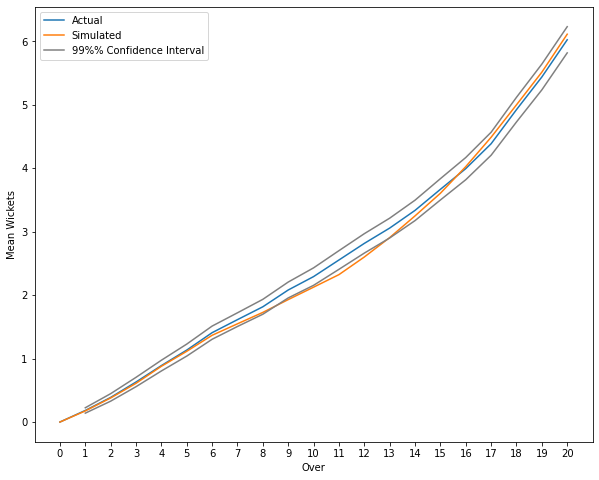

In [61]:
fig = plt.figure(figsize=(10,8))
plt.plot(list(range(0,21)), [np.mean(rowl_o[o]) for o in range(21)], label='Actual')
plt.plot(list(range(0,21)), np.nanmean(sim_rowl_o,axis=0), label='Simulated')
plt.plot(list(range(0,21)), lci, color='gray', label='99%% Confidence Interval')
plt.plot(list(range(0,21)), hci, color='gray')
#plt.plot(list(range(20)), mimp_o[:,0])
plt.xticks(list(range(0,21)))
plt.xlabel('Over')
plt.ylabel('Mean Wickets')
plt.legend()